In [ ]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout , TimeDistributed , Conv1D , MaxPooling1D , Flatten , Bidirectional
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/BTC-USD (BaoCao).csv")

In [ ]:
df1 = df.iloc[:,4:5]

In [ ]:
df1

,Close
0,3859.583740
1,3864.415039
2,3847.175781
3,3761.557129
4,3896.375000
...,...
1915,68296.218750
1916,67578.093750
1917,68364.992188
1918,67491.414063


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)

In [ ]:
train_size=int(len(df1)*0.7)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [ ]:
def makeFeature(data,feature=100):
    x = list()
    y = list()
    for i in range(len(data)-feature-1):
        x.append(data[i:(i + feature),0])
        y.append(data[i + feature,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
x_train,y_train = makeFeature(train_data)

In [ ]:
x_test,y_test = makeFeature(test_data)

In [ ]:
x_train.shape[0]

1243

In [ ]:
x_train.shape[1]

100

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],1,100,1))

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0],1,100,1))

In [ ]:
model = Sequential([
    TimeDistributed(Conv1D(filters = 6,kernel_size = 3, activation = 'relu'),input_shape=(None, 100, 1)),
    TimeDistributed(MaxPooling1D()),
    TimeDistributed(Flatten()),
    LSTM(100,return_sequences=False,input_shape=(x_train.shape[1],1)),
    Dropout(0.42),
    Dense(1)
])
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
checkpoint = ModelCheckpoint(filepath='model.hdf5',
                             verbose=1,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True)

In [ ]:
stock_price = model.fit(x_train,y_train,epochs=100,batch_size=24,verbose=1,callbacks=checkpoint)

Epoch 1/100
45/52 [========================>.....] - ETA: 0s - loss: 0.0329

52/52 [==============================] - 3s 6ms/step - loss: 0.0301
Epoch 2/100
45/52 [========================>.....] - ETA: 0s - loss: 0.0103

52/52 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 3/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0062

52/52 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 4/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0050

52/52 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 5/100
51/52 [============================>.] - ETA: 0s - loss: 0.0043

52/52 [==============================] - 0s 7ms/step - loss: 0.0044
Epoch 6/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0041

52/52 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 7/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0034

52/52 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 8/100
44/52 [========================>.....] - ETA: 0s - loss: 0.0035

52/52 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 9/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0035

52/52 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 10/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0031

52/52 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 11/100
46/52 [=========================>....] - ETA: 0s - loss: 0.0030

52/52 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 12/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0029

52/52 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 13/100
52/52 [==============================] - ETA: 0s - loss: 0.0028

52/52 [==============================] - 1s 10ms/step - loss: 0.0028
Epoch 14/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0029

52/52 [==============================] - 1s 13ms/step - loss: 0.0028
Epoch 15/100
51/52 [============================>.] - ETA: 0s - loss: 0.0028

52/52 [==============================] - 1s 14ms/step - loss: 0.0027
Epoch 16/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0026

52/52 [==============================] - 1s 13ms/step - loss: 0.0025
Epoch 17/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0025

52/52 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 18/100
51/52 [============================>.] - ETA: 0s - loss: 0.0024

52/52 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 19/100
51/52 [============================>.] - ETA: 0s - loss: 0.0023

52/52 [==============================] - 1s 11ms/step - loss: 0.0023
Epoch 20/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0023

52/52 [==============================] - 1s 10ms/step - loss: 0.0023
Epoch 21/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0022

52/52 [==============================] - 1s 10ms/step - loss: 0.0022
Epoch 22/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0020

52/52 [==============================] - 1s 11ms/step - loss: 0.0019
Epoch 23/100
52/52 [==============================] - ETA: 0s - loss: 0.0019

52/52 [==============================] - 1s 11ms/step - loss: 0.0019
Epoch 24/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0019

52/52 [==============================] - 1s 17ms/step - loss: 0.0020
Epoch 25/100
46/52 [=========================>....] - ETA: 0s - loss: 0.0018

52/52 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 26/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0018

52/52 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 27/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0019

52/52 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 28/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0018

52/52 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 29/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0016

52/52 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 30/100
47/52 [==========================>...] - ETA: 0s - loss: 0.0017

52/52 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 31/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0016

52/52 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 32/100
51/52 [============================>.] - ETA: 0s - loss: 0.0016

52/52 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 33/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0016

52/52 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 34/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0016

52/52 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 35/100
52/52 [==============================] - ETA: 0s - loss: 0.0016

52/52 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 36/100
45/52 [========================>.....] - ETA: 0s - loss: 0.0018

52/52 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 37/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0015

52/52 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 38/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0015

52/52 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 39/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0016

52/52 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 40/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0013

52/52 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 41/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0014

52/52 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 42/100
47/52 [==========================>...] - ETA: 0s - loss: 0.0014

52/52 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 43/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0014

52/52 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 44/100
52/52 [==============================] - ETA: 0s - loss: 0.0014

52/52 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 45/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0012

52/52 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 46/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0014

52/52 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 47/100
47/52 [==========================>...] - ETA: 0s - loss: 0.0012

52/52 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 48/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0013

52/52 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 49/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0013

52/52 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 50/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0014

52/52 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 51/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0013

52/52 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 52/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0015

52/52 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 53/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0013

52/52 [==============================] - 1s 10ms/step - loss: 0.0013
Epoch 54/100
51/52 [============================>.] - ETA: 0s - loss: 0.0013

52/52 [==============================] - 1s 11ms/step - loss: 0.0013
Epoch 55/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0011    

52/52 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 56/100
51/52 [============================>.] - ETA: 0s - loss: 0.0013

52/52 [==============================] - 1s 11ms/step - loss: 0.0013
Epoch 57/100
51/52 [============================>.] - ETA: 0s - loss: 0.0010

52/52 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 58/100
51/52 [============================>.] - ETA: 0s - loss: 0.0017

52/52 [==============================] - 1s 11ms/step - loss: 0.0017
Epoch 59/100
51/52 [============================>.] - ETA: 0s - loss: 0.0013

52/52 [==============================] - 1s 11ms/step - loss: 0.0013
Epoch 60/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0012

52/52 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 61/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0011

52/52 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 62/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0013

52/52 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 63/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0010

52/52 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 64/100
47/52 [==========================>...] - ETA: 0s - loss: 0.0011

52/52 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 65/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0014

52/52 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 66/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0010

52/52 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 67/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0013

52/52 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 68/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0011

52/52 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 69/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0012

52/52 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 70/100
45/52 [========================>.....] - ETA: 0s - loss: 9.5443e-04

52/52 [==============================] - 0s 7ms/step - loss: 9.9188e-04
Epoch 71/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0012

52/52 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 72/100
46/52 [=========================>....] - ETA: 0s - loss: 0.0010

52/52 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 73/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0011

52/52 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 74/100
45/52 [========================>.....] - ETA: 0s - loss: 0.0011

52/52 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 75/100
47/52 [==========================>...] - ETA: 0s - loss: 0.0011

52/52 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 76/100
51/52 [============================>.] - ETA: 0s - loss: 0.0011

52/52 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 77/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0011

52/52 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 78/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0010    

52/52 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 79/100
51/52 [============================>.] - ETA: 0s - loss: 0.0011

52/52 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 80/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0010    

52/52 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 81/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0010    

52/52 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 82/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0010

52/52 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 83/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0010    

52/52 [==============================] - 0s 7ms/step - loss: 9.9666e-04
Epoch 84/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0011

52/52 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 85/100
51/52 [============================>.] - ETA: 0s - loss: 0.0010

52/52 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 86/100
49/52 [===========================>..] - ETA: 0s - loss: 9.2495e-04

52/52 [==============================] - 0s 7ms/step - loss: 9.2796e-04
Epoch 87/100
49/52 [===========================>..] - ETA: 0s - loss: 0.0010

52/52 [==============================] - 0s 9ms/step - loss: 0.0010
Epoch 88/100
52/52 [==============================] - ETA: 0s - loss: 9.6823e-04

52/52 [==============================] - 1s 11ms/step - loss: 9.6823e-04
Epoch 89/100
50/52 [===========================>..] - ETA: 0s - loss: 0.0011

52/52 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 90/100
51/52 [============================>.] - ETA: 0s - loss: 9.1600e-04

52/52 [==============================] - 1s 11ms/step - loss: 9.1101e-04
Epoch 91/100
51/52 [============================>.] - ETA: 0s - loss: 9.0649e-04

52/52 [==============================] - 1s 11ms/step - loss: 9.2042e-04
Epoch 92/100
49/52 [===========================>..] - ETA: 0s - loss: 9.9139e-04

52/52 [==============================] - 1s 12ms/step - loss: 0.0010
Epoch 93/100
51/52 [============================>.] - ETA: 0s - loss: 9.7913e-04

52/52 [==============================] - 1s 11ms/step - loss: 9.7719e-04
Epoch 94/100
47/52 [==========================>...] - ETA: 0s - loss: 0.0011

52/52 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 95/100
51/52 [============================>.] - ETA: 0s - loss: 0.0010

52/52 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 96/100
47/52 [==========================>...] - ETA: 0s - loss: 0.0010

52/52 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 97/100
46/52 [=========================>....] - ETA: 0s - loss: 9.5966e-04

52/52 [==============================] - 0s 7ms/step - loss: 9.6883e-04
Epoch 98/100
49/52 [===========================>..] - ETA: 0s - loss: 9.6961e-04

52/52 [==============================] - 0s 7ms/step - loss: 9.4706e-04
Epoch 99/100
48/52 [==========================>...] - ETA: 0s - loss: 0.0010

52/52 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 100/100
46/52 [=========================>....] - ETA: 0s - loss: 0.0010

52/52 [==============================] - 0s 7ms/step - loss: 9.9696e-04


In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

15/15 [==============================] - 0s 4ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
test_rmse = np.sqrt(np.mean((test_predict - y_test)**2))
test_mape = np.mean(np.abs((y_test - test_predict) / y_test)) * 100
test_mse = np.mean((np.array(y_test) - np.array(test_predict))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 41552.40594852812
Testing MAPE: 8970583.803996427
Testing MSE: 1726602440.1112747


In [ ]:
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

In [ ]:
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

In [ ]:
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

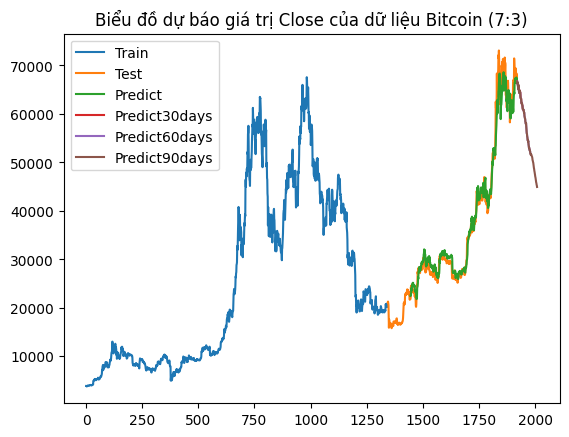

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(test_predict))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Bitcoin (7:3)")
plt.show()

In [ ]:
train_size_82=int(len(df1)*0.8)
test_size_82=len(df1)-train_size_82
train_data_82,test_data_82=df1[0:train_size_82,:],df1[train_size_82:len(df1),:1]

In [ ]:
x_train_82,y_train_82 = makeFeature(train_data_82)

In [ ]:
x_test_82, y_test_82 = makeFeature(test_data_82)

In [ ]:
x_train_82 = np.reshape(x_train_82,(x_train_82.shape[0],1,100,1))

In [ ]:
x_test_82 = np.reshape(x_test_82,(x_test_82.shape[0],1,100,1))

In [ ]:
model.fit(x_train_82,y_train_82,epochs=100,batch_size=24,verbose=1)

Epoch 1/100
60/60 [==============================] - 1s 10ms/step - loss: 9.0017e-04
Epoch 2/100
60/60 [==============================] - 0s 8ms/step - loss: 8.4272e-04
Epoch 3/100
60/60 [==============================] - 0s 7ms/step - loss: 9.7003e-04
Epoch 4/100
60/60 [==============================] - 0s 6ms/step - loss: 8.8488e-04
Epoch 5/100
60/60 [==============================] - 0s 7ms/step - loss: 8.4041e-04
Epoch 6/100
60/60 [==============================] - 0s 8ms/step - loss: 9.1467e-04
Epoch 7/100
60/60 [==============================] - 1s 11ms/step - loss: 8.5484e-04
Epoch 8/100
60/60 [==============================] - 1s 10ms/step - loss: 8.4818e-04
Epoch 9/100
60/60 [==============================] - 1s 11ms/step - loss: 9.8594e-04
Epoch 10/100
60/60 [==============================] - 1s 11ms/step - loss: 8.9746e-04
Epoch 11/100
60/60 [==============================] - 1s 10ms/step - loss: 9.6744e-04
Epoch 12/100
60/60 [==============================] - 1s 10ms/step -

In [ ]:
train_predict_82=model.predict(x_train_82)
test_predict_82=model.predict(x_test_82)

9/9 [==============================] - 0s 5ms/step


In [ ]:
train_predict_82=scaler.inverse_transform(train_predict_82)
test_predict_82=scaler.inverse_transform(test_predict_82)

In [ ]:
test_rmse = np.sqrt(np.mean((test_predict_82 - y_test_82)**2))
test_mape = np.mean(np.abs((y_test_82 - test_predict_82) / y_test_82)) * 100
test_mse = np.mean((np.array(y_test_82) - np.array(test_predict_82))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 47812.575468607836
Testing MAPE: 8460484.142827945
Testing MSE: 2286042372.94132


In [ ]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

In [ ]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

In [ ]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

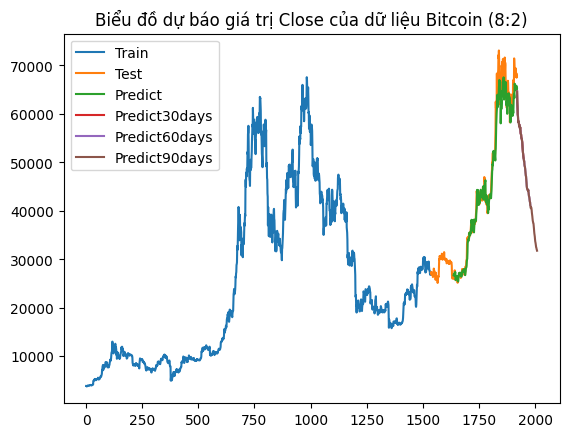

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_82, step=1)
plt.plot(scaler.inverse_transform(train_data_82))
test_data_index = pd.RangeIndex(start=train_size_82, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_82))
test_data_index = pd.RangeIndex(start=train_size_82+101, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,(test_predict_82))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Bitcoin (8:2)")
plt.show()

In [ ]:
train_size_91=int(len(df1)*0.9)
test_size_91=len(df1)-train_size_91
train_data_91,test_data_91=df1[0:train_size_91,:],df1[train_size_91:len(df1),:1]

In [ ]:
x_train_91,y_train_91 = makeFeature(train_data_91)

In [ ]:
x_test_91, y_test_91 = makeFeature(test_data_91)

In [ ]:
x_train_91 = np.reshape(x_train_91,(x_train_91.shape[0],1,100,1))

In [ ]:
x_test_91 = np.reshape(x_test_91,(x_test_91.shape[0],1,100,1))

In [ ]:
model.fit(x_train_91,y_train_91,epochs=100,batch_size=24,verbose=1)

Epoch 1/100
68/68 [==============================] - 1s 12ms/step - loss: 7.0785e-04
Epoch 2/100
68/68 [==============================] - 1s 12ms/step - loss: 7.2609e-04
Epoch 3/100
68/68 [==============================] - 1s 12ms/step - loss: 7.0974e-04
Epoch 4/100
68/68 [==============================] - 1s 12ms/step - loss: 7.2094e-04
Epoch 5/100
68/68 [==============================] - 1s 9ms/step - loss: 8.1034e-04
Epoch 6/100
68/68 [==============================] - 0s 6ms/step - loss: 7.4030e-04
Epoch 7/100
68/68 [==============================] - 0s 6ms/step - loss: 7.0118e-04
Epoch 8/100
68/68 [==============================] - 0s 7ms/step - loss: 7.1939e-04
Epoch 9/100
68/68 [==============================] - 0s 6ms/step - loss: 7.6770e-04
Epoch 10/100
68/68 [==============================] - 0s 7ms/step - loss: 7.5054e-04
Epoch 11/100
68/68 [==============================] - 0s 6ms/step - loss: 6.9141e-04
Epoch 12/100
68/68 [==============================] - 0s 7ms/step - lo

In [ ]:
train_predict_91=model.predict(x_train_91)
test_predict_91=model.predict(x_test_91)

3/3 [==============================] - 0s 6ms/step


In [ ]:
train_predict_91=scaler.inverse_transform(train_predict_91)
test_predict_91=scaler.inverse_transform(test_predict_91)

In [ ]:
test_rmse = np.sqrt(np.mean((test_predict_91 - y_test_91)**2))
test_mape = np.mean(np.abs((y_test_91 - test_predict_91) / y_test_91)) * 100
test_mse = np.mean((np.array(y_test_91) - np.array(test_predict_91))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 64470.807078458165
Testing MAPE: 7158742.608233792
Testing MSE: 4156484965.3477716


In [ ]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

In [ ]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

In [ ]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.67756889 0.68967404 0.69201294 0.73224787 0.76921984 0.84739737
 0.82855187 0.84647189 0.84054613 0.85695541 0.93143461 0.86609866
 0.89935805 0.91116787 0.93099723 0.93386485 0.94137915 0.98615743
 0.97688739 1.         0.97566562 0.9469183  0.88793761 0.93230318
 0.9201565  0.83885728 0.92542292 0.89048043 0.86577499 0.86986376
 0.91562083 0.95492499 0.95534366 0.94766222 0.96626542 0.95397313
 0.9504025  0.97475761 0.95122249 0.88983968 0.89754056 0.93400854
 0.92432613 0.93959502 0.9463237  0.97905222 0.94309905 0.96399961
 0.95639345 0.91506827 0.86639112 0.89404836 0.86068929 0.8662525
 0.82968151 0.86193771 0.86670989 0.88331172 0.88233372 0.90990125
 0.90369245 0.87296084 0.87591529 0.86543684 0.8605873  0.85617441
 0.86667455 0.82045159 0.78607801 0.7986198  0.85295184 0.8674009
 0.86941556 0.8568772  0.84494544 0.82840125 0.85526172 0.82270083
 0.8227143  0.8321584  0.85311937 0.83366434 0.90167604 0.88673257
 0.91299111 0.91138888 0.90183292 0.97641    0.95748

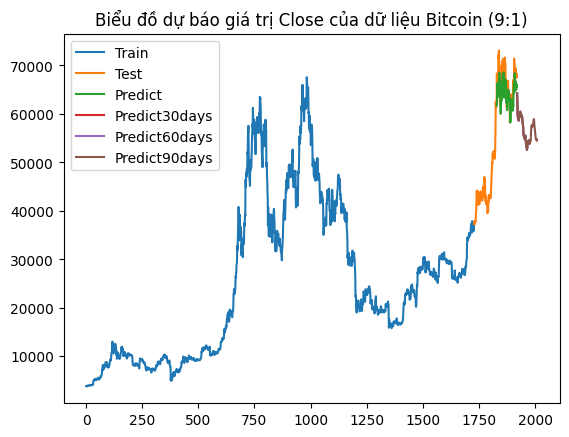

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_91, step=1)
plt.plot(scaler.inverse_transform(train_data_91))
test_data_index = pd.RangeIndex(start=train_size_91, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_91))
test_data_index = pd.RangeIndex(start=train_size_91+101, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,(test_predict_91))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Bitcoin (9:1)")
plt.show()